In [9]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
import warnings
from scipy.signal import find_peaks
warnings.filterwarnings('ignore')

# SATE

Text(0, 0.5, 'yout')

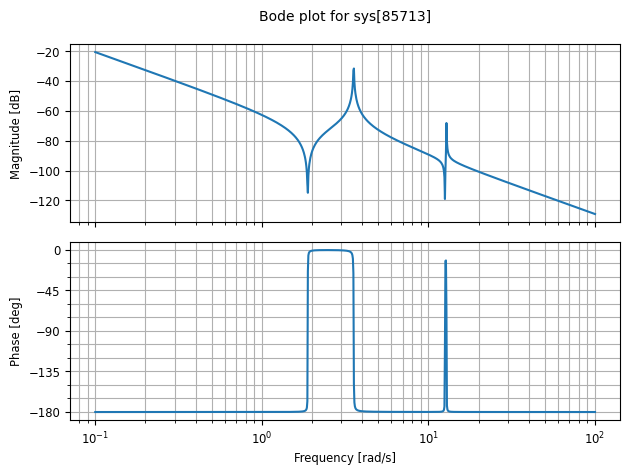

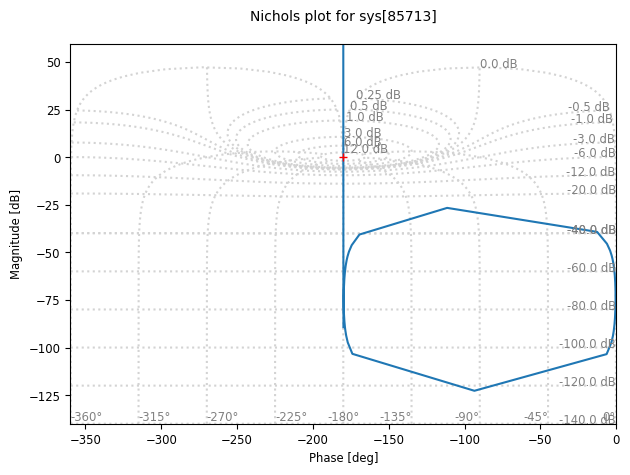

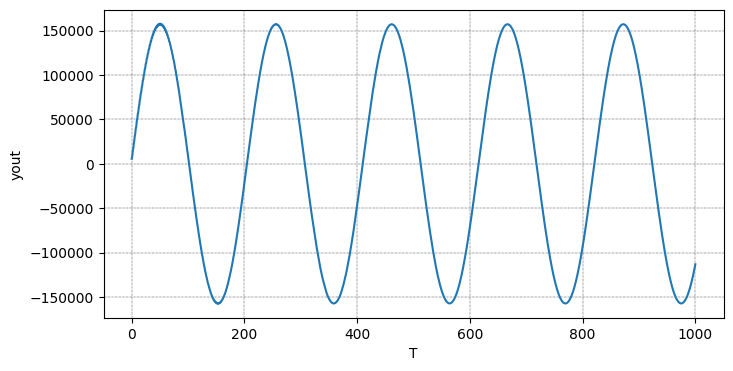

In [10]:
Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

# Modo elastico de antena 

I0 = 1025
f1 = 2.0
psi1 = 0.001

w1 = 2*np.pi*f1
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1,   w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])
 
# Modo elastico de los paneles solares
 
I0 =300
f2 = 0.3
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf1 = ct.tf(n1,d1)
tf2 = ct.tf(n2,d2)


sys = tf1*tf2*tfS
sysCL = sys/(1+sys)

mag,phase,omega =  ct.bode(sys,plot=True,Hz=False,dB=True,deg=True)

ct.nichols(sys,[0.001,10])

T, yout = ct.step_response(sysCL,1000,1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")

# CONT

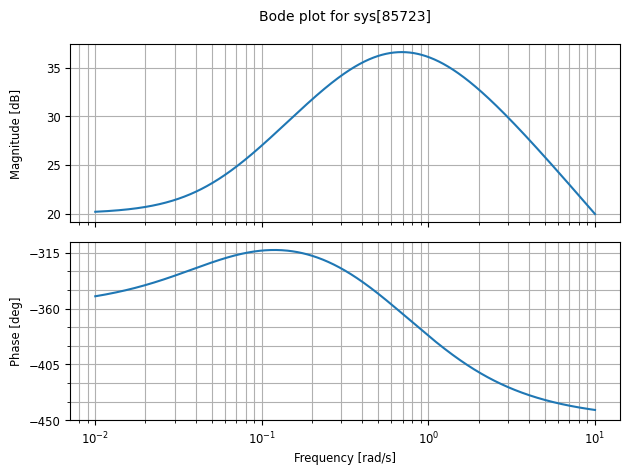

In [11]:
Is = 1069
k = 1.*10
psi = 1.0

Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay, ddelay)


sys = tfC*tfDelay
sysCL = sys/(1+sys)

ct.bode(sys,Hz=False,dB=True,deg=True)

# FILT

In [12]:
from scipy.signal import ellip, butter

<TransferFunction>: sys[85730]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


s^2 + 0.065 s + 0.4225
----------------------
s^2 + 0.13 s + 0.4225

(np.float64(1.041276066342287), inf, np.float64(1.4000506631382332), nan)
(inf, inf, nan, nan)
(inf, inf, nan, nan)


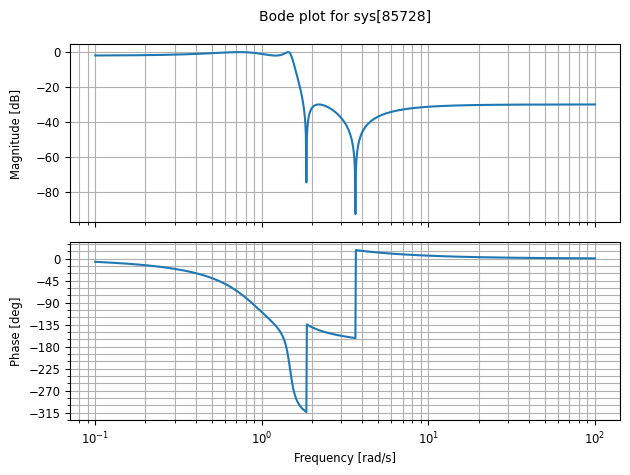

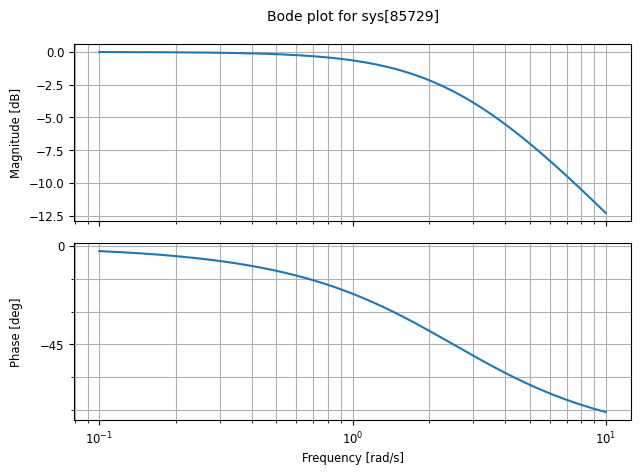

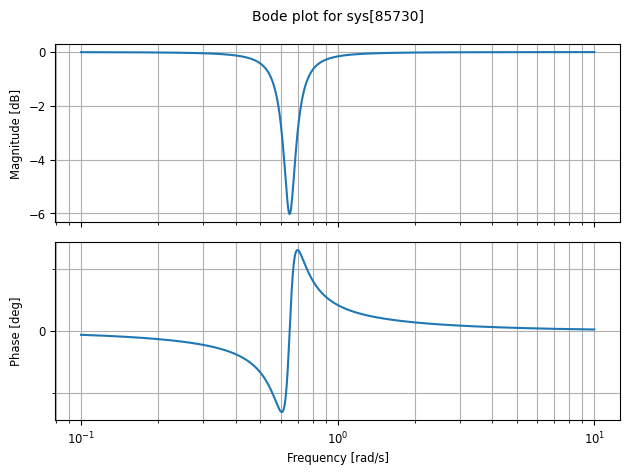

In [13]:
N1,D1 = ellip(4,2.,30,1.5,'low',analog=True)
sys_F1 = ct.tf(N1,D1)

N2,D2 = butter(1,2.5,'low',analog=True)
sys_F2 = ct.tf(N2,D2)

# Filtro NOTCH
# Parámetros
wc = 0.65      # Frecuencia central (rad/s)
psiz = 0.05    # Amortiguamiento del cero
psip = 0.1     # Amortiguamiento del polo

# Filtro Notch
sys_F3 = ct.tf([1, 2*psiz*wc, wc**2], [1, 2*psip*wc, wc**2])

# Mostrar el filtro en el dominio de Laplace
print(sys_F3)
plt.figure()
ct.bode(sys_F1,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F1))
plt.figure()
ct.bode(sys_F2,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F2))
plt.figure()
ct.bode(sys_F3,Hz=False,dB=True,deg=True)
print(ct.margin(sys_F3))

# Todo Junto

Margen de fase en grados:  37.44765427492865
Atenuacion:  -33.57854530734866
Frecuencia crossover: 0.160400310705682
Rm2:  0.1
f2:  0.325
k:  15


Text(0, 0.5, 'yout')

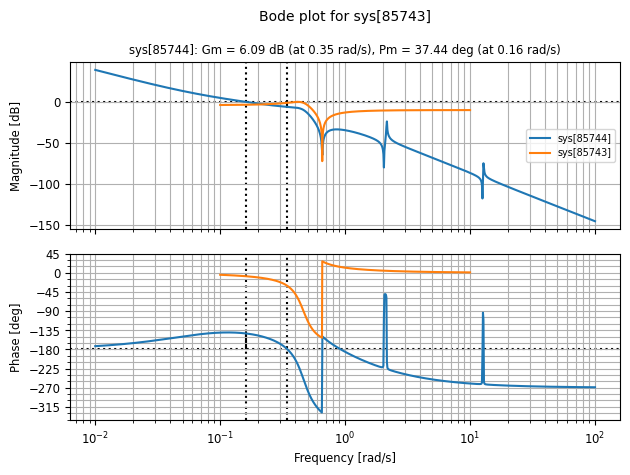

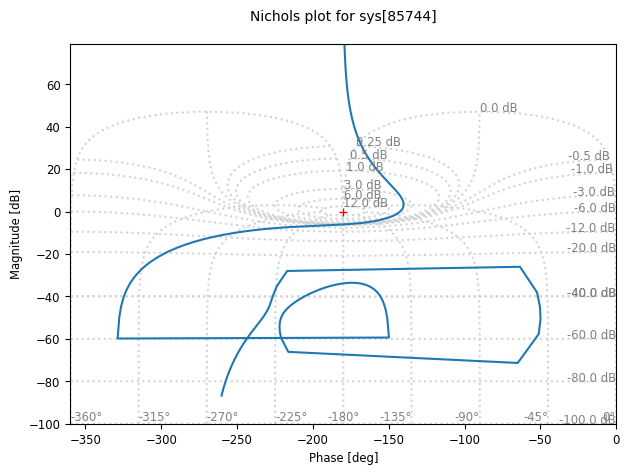

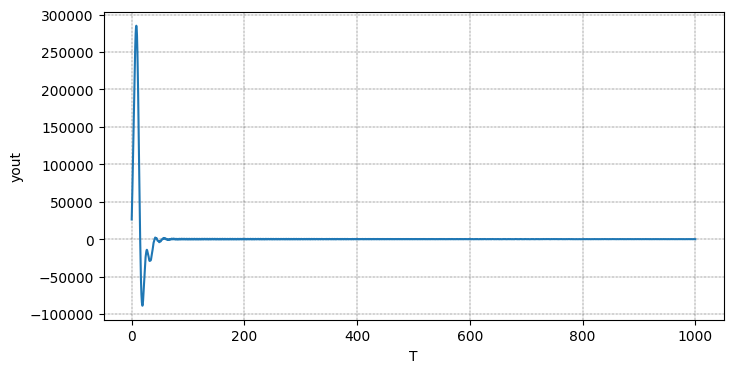

In [14]:
ORDERFILTER__ = 2
FRECCUTFILTER__ = 0.5
N1,D1 = ellip(ORDERFILTER__,4.,10,FRECCUTFILTER__,'low',analog=True)

Is = 1069
ns = 1
ds = np.array([Is, 0, 0])
sys = ct.tf(ns,ds)
rm1 = 0.04
I0 = Is*(1-rm1)
f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)
n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])
tf1 = ct.tf(n1,d1) 
sys = sys * tf1
    
# Modo elastico de los paneles solares

rm2 = 0.1          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.325            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf2 = ct.tf(n2,d2) 
sys = sys * tf2

# LEAD-LAG

k = 15        # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)
sys = sys*tfDelay


#FILTRO ELIPTICO
sys_F1 = ct.tf(N1,D1)
sys = sys*sys_F1

sysCL=sys/(1+sys)


# Analisis

mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True, margins=True)
ct.bode(sys_F1, plot=True, Hz=False, dB=True, deg=True)
ct.nichols(sys,[0.001,10])




peaks, _ = find_peaks(mag)
print("Margen de fase en grados: ", 180+(180/np.pi)*phase[np.argmin(np.abs(mag - 1))])
print("Atenuacion: ", 20*np.log10(mag[peaks[0]]))
print("Frecuencia crossover:", omega[np.argmin(np.abs(mag - 1))])
print("Rm2: ", rm2)
print("f2: ", f2)
print("k: ", k)



T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")

In [15]:
sysPrima = sys
def getParameters(rm2_, f2_):
    k = 0.1
    margenFase = 100
    atenuacion = -100
    segundoPicoAtt = -100
    margenFasePrev = margenFase
    atenuacionPrev = atenuacion
    segundoPicoAttPrev = segundoPicoAtt
    kPrev = k

    while(margenFase > 30 and atenuacion < -6 and segundoPicoAtt < -6):
        # Satelite 
        Is = 1069
        ns = 1
        ds = np.array([Is, 0, 0])
        tfS = ct.tf(ns,ds)
        sys = tfS
        rm1 = 0.04
        I0 = Is*(1-rm1)

        f1 = 2.0
        psi1 = 0.001
        w1 = 2*np.pi*f1
                
        psi1m = psi1*np.sqrt(Is/I0)
        w1m = w1*np.sqrt(Is/I0)

        n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
        d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

        tf1 = ct.tf(n1,d1) 
        sys = sys * tf1
            
        # Modo elastico de los paneles solares

        
        I0 = Is*(1-rm2_)

        
        psi2 = 0.001

        w2 = 2*np.pi*f2_
        psi2m = psi2*np.sqrt(Is/I0)
        w2m = w2*np.sqrt(Is/I0)

        n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
        d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])
        tf2 = ct.tf(n2,d2)

        sys = sys * tf2

        # LEAD-LAG

        psi = 1.
        Wn = np.sqrt ( k/Is )
        kd = 2*psi*Wn*Is
        Td = kd/k

        nc = np.array([k*Td, k])
        dc = np.array([Td/10, 1])

        tfC = ct.tf(nc,dc)
        sys = sys * tfC

        Tdelay = 1
        ndelay = 1
        ddelay = np.array([Tdelay, 1])

        tfDelay = ct.tf(ndelay,ddelay)

        sys = sys*tfDelay

        # Filtro

        #FILTRO ELIPTICO
        sys_F1 = ct.tf(N1,D1)

        sys = sys*sys_F1

        sysCL=sys/(1+sys)
        
        mag,phase,omega = ct.bode(sys,plot=False,Hz=False,dB=True,deg=True)

        peaks, _ = find_peaks(mag)
        margenFase = 180+(180/np.pi)*phase[np.argmin(np.abs(mag - 1))]
        atenuacion = 20*np.log10(mag[peaks[0]])
        
        if(len(peaks) > 1):
            segundoPicoAtt = 20*np.log10(mag[peaks[1]])
        
        crossoverFreq = omega[np.argmin(np.abs(mag - 1))]
    
        if margenFase > 30 and atenuacion < -6 and segundoPicoAtt < -6:
            segundoPicoAttPrev = segundoPicoAtt
            margenFasePrev = margenFase
            atenuacionPrev = atenuacion
            crossoverFreqPrev = crossoverFreq
            kPrev = k

        k = k+0.1
        
        
    return sys, kPrev, margenFasePrev, atenuacionPrev, crossoverFreqPrev, segundoPicoAttPrev


# Define the range of values for rm2_ and f2_
rm2_values = np.linspace(0.1, 0.5, 5)  # Example range for rm2_
f2_values = np.linspace(0.1, 1.0, 5)  # Example range for f2_

# Initialize an empty list to store the results
results = []

for rm2_ in rm2_values:
    for f2_ in f2_values:
        sysBestK, k, margenFase, atenuacion, crossoverFreq, segundoPicoAtt = getParameters(rm2_, f2_)
        results.append([rm2_, f2_, k, margenFase, atenuacion, crossoverFreq, segundoPicoAtt])
        plt.figure()
        magGG, phaseGG, omegaGG = ct.bode(sysBestK, plot=True, Hz=False, dB=True, deg=True, margins=False)
        plt.title(f'Bode Plot para rm2={round(rm2_, 3)}, f2={round(f2_,3)}, k={round(k,3)}, ')
        plt.savefig(f'img/bode_order_{ORDERFILTER__}frecCut_{FRECCUTFILTER__}_rm2_{rm2_}_f2_{f2_}.png')
        plt.close()
        
        plt.figure()
        ct.nichols(sysBestK,[0.001,10])
        plt.title(f'Nichols rm2={round(rm2_, 3)}, f2={round(f2_,3)}, k={round(k,3)}, ')
        plt.savefig(f'img/nichols_order_{ORDERFILTER__}frecCut_{FRECCUTFILTER__}_rm2_{rm2_}_f2_{f2_}.png')
        plt.close()
        
        plt.figure()
        
        sysCLBest = sysBestK/(1+sysBestK)
        T, yout = ct.step_response(sysCLBest,1000,.1)
        plt.figure(figsize=(8,4))
        plt.plot(T,yout)
        plt.grid(color='k', ls = '-.', lw = 0.25)
        plt.xlabel("T")
        plt.ylabel("yout")
        plt.title(f'Step response rm2={round(rm2_, 3)}, f2={round(f2_,3)}, k={round(k,3)}, ')
        plt.savefig(f'img/stepResponse_order_{ORDERFILTER__}frecCut_{FRECCUTFILTER__}_rm2_{rm2_}_f2_{f2_}.png')
        plt.close()
results_array = np.array(results)


filename = f"resultsPunto2_ellipOrder{ORDERFILTER__}frecCut{FRECCUTFILTER__}.csv"
np.savetxt(filename, results_array, delimiter=",", header="rm2, f2, k, margenFase, atenuacion, crossoverFreq, attSegundoPico", comments="", fmt='%.5f')

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

PROBADOR



Text(0, 0.5, 'yout')

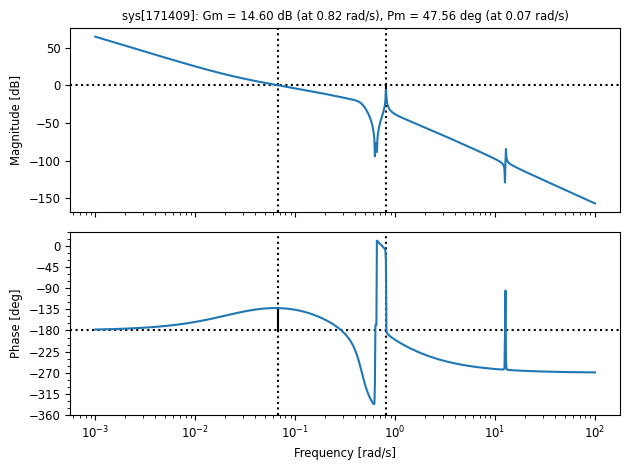

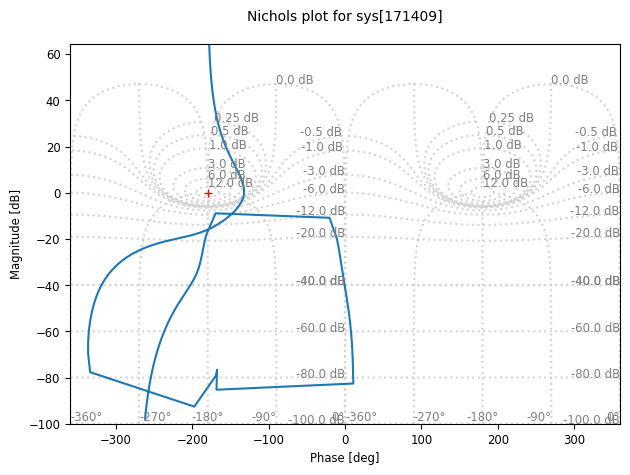

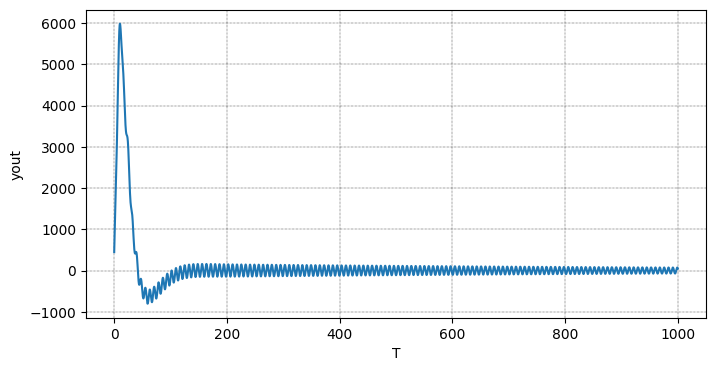

In [16]:
ORDERFILTER__ = 2
FRECCUTFILTER__ = 0.5
FLEX = True
FILTRO = True
DELAY = True

N1,D1 = ellip(ORDERFILTER__,4.,10,FRECCUTFILTER__,'low',analog=True)

# Satelite 

Is = 1069
ns = 1
ds = np.array([Is, 0, 0])

tfS = ct.tf(ns,ds)

sys = tfS

# La proporcion de Inercia aportada por el apendice flexible se regulara con la 
# constante rmi (i=1,2,...)
# rmi = Inercia del Apendice flexible / Inercia total del satelite = Ia/Is
# Por otro lado para calcular la frecuencia modal ( denominador de la funcion de 
# transferencia ) se necesitan Is y I0=Is-Ia
# I0=Is-Ia=Is-rmi*Is=Is*(1-rmi)

# Modo elastico de antena

rm1 = 0.04
I0 = Is*(1-rm1)

f1 = 2.0
psi1 = 0.001
w1 = 2*np.pi*f1
        
psi1m = psi1*np.sqrt(Is/I0)
w1m = w1*np.sqrt(Is/I0)

n1 = Is/I0*np.array([1, 2*psi1*w1, w1*w1])
d1 = np.array([1, 2*psi1m*w1m, w1m*w1m])

tf1 = ct.tf(n1,d1) 

if True:
    sys = sys * tf1
    
# Modo elastico de los paneles solares

rm2 = 0.4          # Variar relacion de inercias rm2 entre (0.1 y 0.5)
I0 = Is*(1-rm2)

f2 = 0.1            # Variar frecuencia de cantilever entre (0.1 y 1.0)
psi2 = 0.001

w2 = 2*np.pi*f2
psi2m = psi2*np.sqrt(Is/I0)
w2m = w2*np.sqrt(Is/I0)

n2 = Is/I0*np.array([1, 2*psi2*w2, w2*w2])
d2 = np.array([1, 2*psi2m*w2m, w2m*w2m])

tf2 = ct.tf(n2,d2) 

if FLEX:
    sys = sys * tf2

# LEAD-LAG

k = 2.8        # Encontrar la ganancia k más grande que cumpla con los 
                # requerimientos para cada rm2 y f2
psi = 1.
Wn = np.sqrt ( k/Is )
kd = 2*psi*Wn*Is
Td = kd/k

nc = np.array([k*Td, k])
dc = np.array([Td/10, 1])

tfC = ct.tf(nc,dc)
sys = sys * tfC

# Delay

Tdelay = 1
ndelay = 1
ddelay = np.array([Tdelay, 1])

tfDelay = ct.tf(ndelay,ddelay)

if DELAY:
    sys = sys*tfDelay


#FILTRO ELIPTICO
sys_F1 = ct.tf(N1,D1)


if FILTRO:
    sys = sys*sys_F1

sysCL=sys/(1+sys)


# Analisis

mag,phase,omega = ct.bode(sys,plot=True,Hz=False,dB=True,deg=True, margins=True)

ct.nichols(sys,[0.001,10])






T, yout = ct.step_response(sysCL,1000,.1)
plt.figure(figsize=(8,4))
plt.plot(T,yout)
plt.grid(color='k', ls = '-.', lw = 0.25)
plt.xlabel("T")
plt.ylabel("yout")